### Index No - 190621M
### Name - K. Thanushan 

### EN2550 Assignment 01
### Intensity Transformations and Neighborhood Filtering

### Question 1. Performing a given intensity transformation for a given image

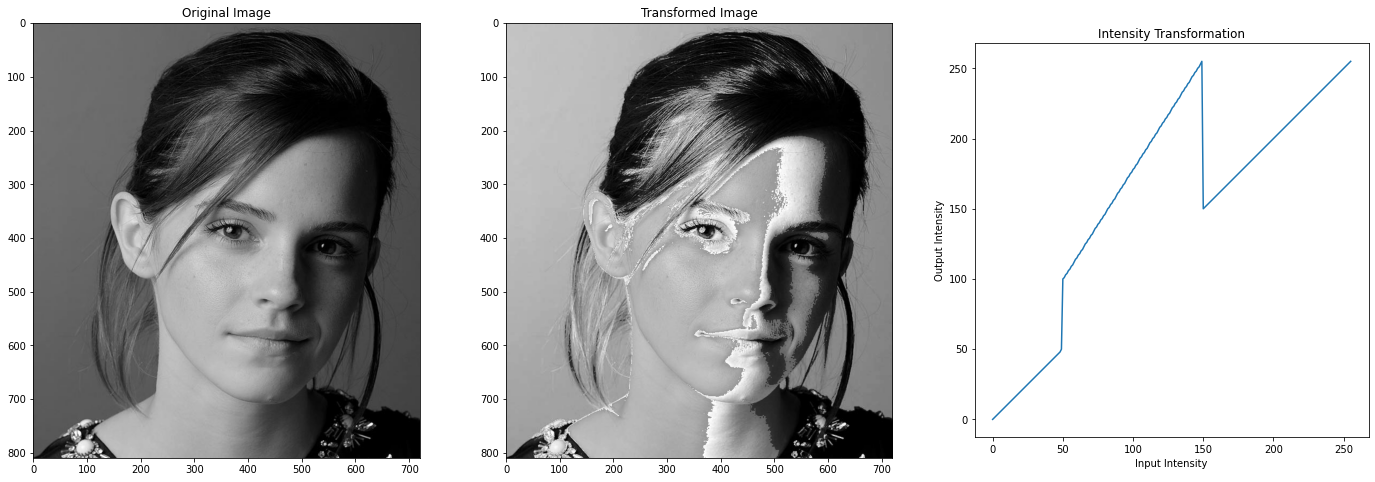

In [18]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the image and plotting its original version
Original_image = cv.imread(r'emma_gray.jpg')
assert Original_image is not None

#Performing the given intensity transformation and plotting the transformed image
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

#Getting the transformed image
assert len(t) == 256
Transformed_image = cv.LUT(Original_image, t)
assert Transformed_image is not None

#Plotting the Images and the intensity transformation
Image = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
Img = cv.cvtColor(Transformed_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (24,8))
ax[0].imshow(Image)
ax[0].set_title('Original Image')
ax[1].imshow(Img)
ax[1].set_title('Transformed Image')
ax[2].plot(t)
ax[2].set_title('Intensity Transformation')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_aspect('equal')
plt.show()


### Question 3. Gamma Correction($\gamma = 0.5$) and Histograms 

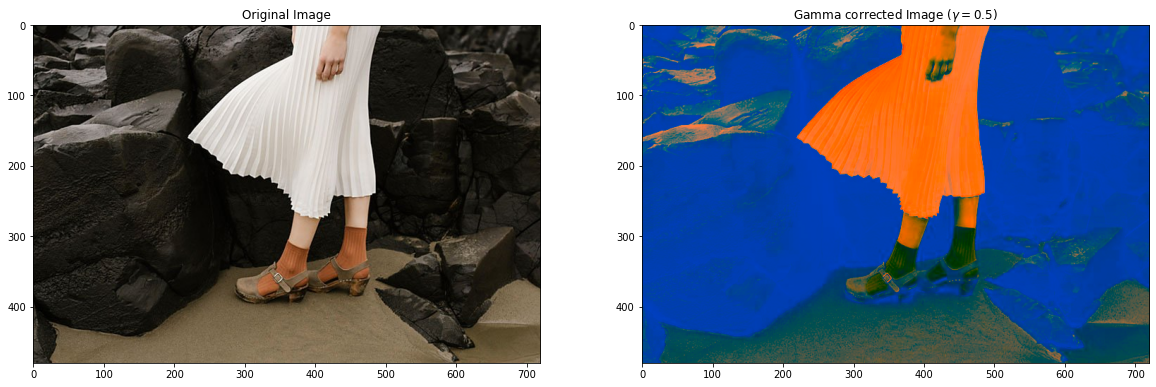

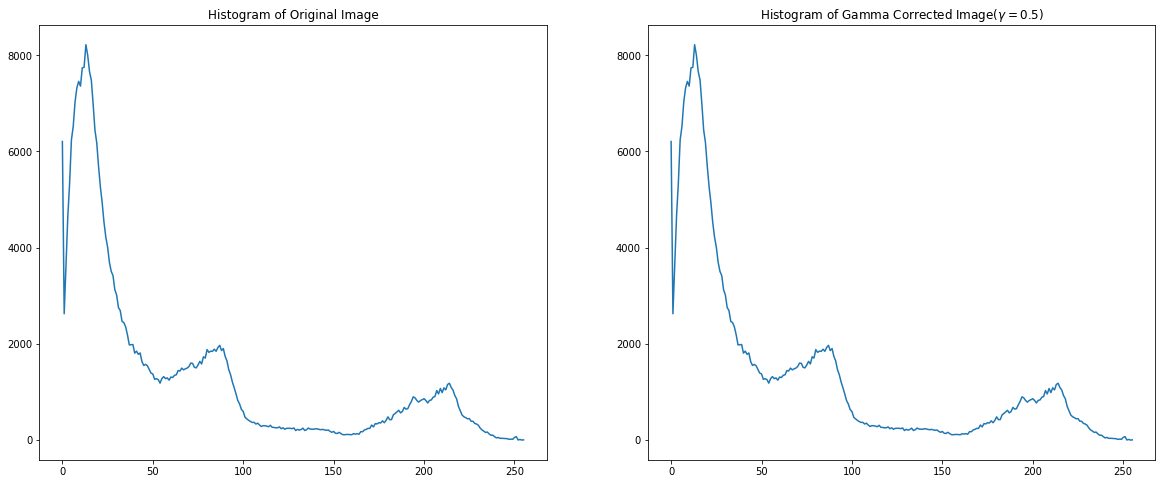

In [20]:
#Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'highlights_and_shadows.jpg')
assert Original_image is not None


#Performing gamma correction
Gamma = 0.5
Lab = cv.cvtColor(Original_image, cv.COLOR_BGR2Lab)
t = np.array([(p/255)**Gamma*255 for p in range(0,256)]).astype(np.uint8)
g = cv.LUT(Lab[0],t)
New_image = Original_image
New_image[0] = g
assert New_image is not None

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')

Image_plot2= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
#fig, ax = plt.subplots()
ax[1].imshow(Image_plot2)
ax[1].set_title("Gamma corrected Image ($\gamma = 0.5$)")
plt.show()

#Calculating the histograms of the images
Original_image_histogram = cv.calcHist([Original_image], [0], None, [256], [0,256])
Changed_image_histogram = cv.calcHist([New_image], [0], None, [256], [0,256])

#Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].plot(Original_image_histogram)
ax[0].set_title('Histogram of Original Image')
ax[1].plot(Changed_image_histogram)
ax[1].set_title('Histogram of Gamma Corrected Image($\gamma = 0.5$)')
plt.show()


### Question 4. Calculating and Equalizing the histogram of a given image

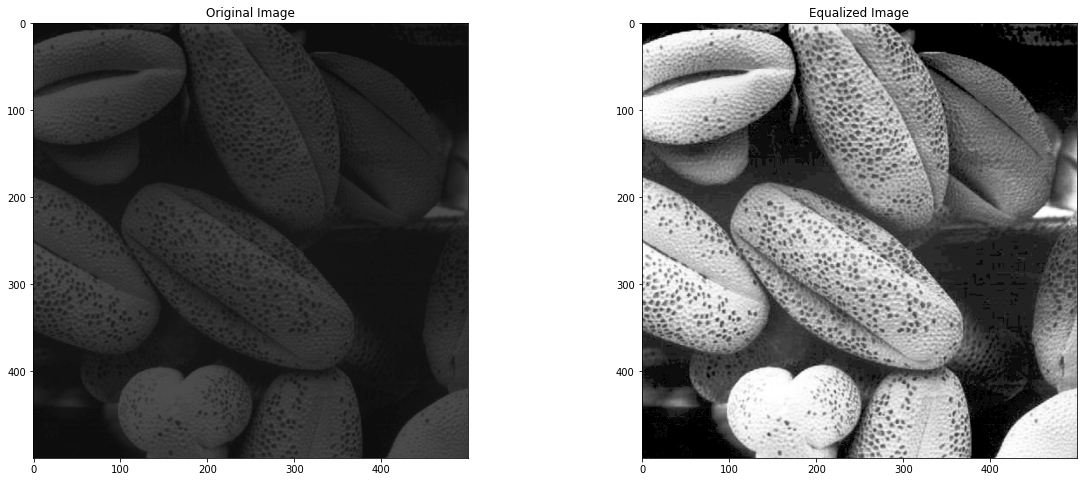

Text(0.5, 1.0, 'Histogram of Equalized Image')

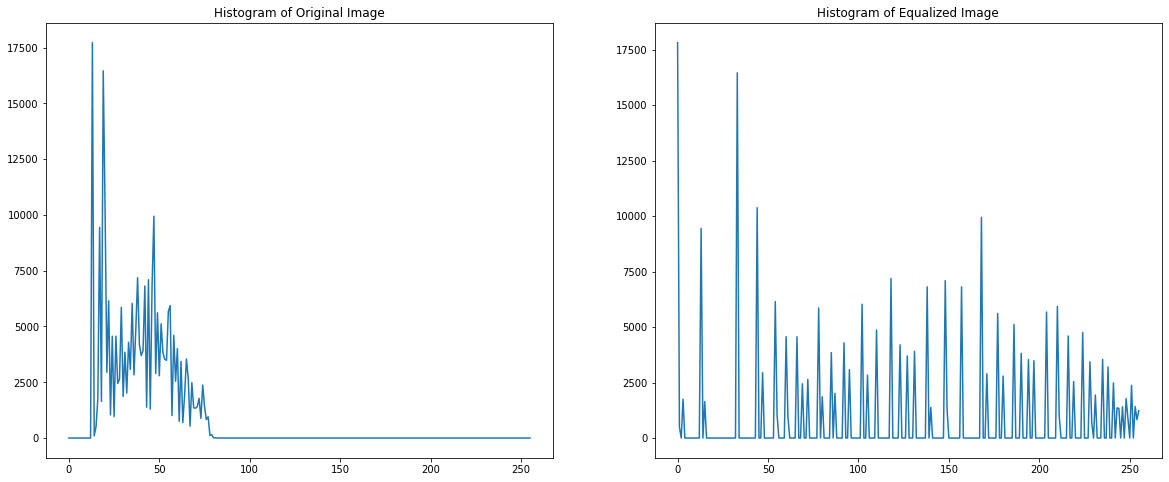

In [21]:
#Question 4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the image
Initial_image = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert Initial_image is not None

#Calculating the histograms of the initial image and the equalized image
Original_image_histogram = cv.calcHist([Initial_image], [0], None, [256], [0,256])
Equalized_image = cv.equalizeHist(Initial_image)
Equalized_image_histogram = cv.calcHist([Equalized_image], [0], None, [256], [0,256])

#Plotting the images
Plotting_image  = cv.cvtColor(Initial_image, cv.COLOR_BGR2RGB)
Equalized_image_plot = cv.cvtColor(Equalized_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2,figsize = (20,8))
ax[0].imshow(Plotting_image)
ax[0].set_title('Original Image')
ax[1].imshow(Equalized_image_plot)
ax[1].set_title('Equalized Image')
plt.show()

#Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].plot(Original_image_histogram)
ax[0].set_title('Histogram of Original Image')
ax[1].plot(Equalized_image_histogram)
ax[1].set_title('Histogram of Equalized Image')
